In [1]:
# Because fetch_mldata is deprecated since scikit-learn 0.20, we'll use fetch_openml instead.

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

pd.set_option('display.max_columns', 18)
pd.set_option('display.width', 300)

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
print(dir(mnist))
len(mnist['target']), type(mnist['target']), len(mnist['data']), type(mnist['data'])

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


(70000, pandas.core.series.Series, 70000, pandas.core.frame.DataFrame)

In [4]:
print(mnist['url'])
print()

print(mnist['data'].tail())
print()

print(mnist['target_names'])
print(mnist['target'].tail())
print()
print(mnist['DESCR'])

https://www.openml.org/d/554

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0   

In [5]:
mnist['target'].dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [6]:
# Since dtype of mnist['target'] is Category having a set of strings, we need to covert it to integer
mnist['target'] = mnist['target'].astype(np.int8)

mnist['target'].dtype

dtype('int8')

In [7]:
print(mnist['target'].head())

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int8


In [8]:
x, y = mnist["data"], mnist["target"]

# We'll normalize the data to keep our gradient descents manageable
x = x / 255

In [9]:
x.shape, y.shape

((70000, 784), (70000,))

In [10]:
# Check the distribution of target values
y.value_counts().sort_index()

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: class, dtype: int64

In [11]:
# As building a zero-classifer, we label 1 for the target 0 and 0 otherwise. Note that y has type change from pd.Series to np.array.
y_new = np.zeros(y.shape)
y_new[np.where(y==0)] = 1
y = y_new
print(type(y))

<class 'numpy.ndarray'>


In [12]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([63097,  6903], dtype=int64))

In [13]:
print(type(x), type(y))

# Since type of x is pd.DataFrame, we'll convert it into np.array
x = x.values
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
x.shape, y.shape

((70000, 784), (70000,))

In [15]:
# We make the data split into train/test (60000 vs 10000). We alse transform each example
m = 60000
m_test = x.shape[0] - m

x_train, x_test = x[:m].T,  x[m:].T
y_train, y_test = y[:m].reshape(1, m), y[m:].reshape(1, m_test)

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((784, 60000), (1, 60000), (784, 10000), (1, 10000))

In [17]:
# Finally we'll shuffle the training data set for good measure
np.random.seed(138)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]

In [18]:
# Finally we'll check the type and shape of our dataset
print(f"x_train ::  type : {type(x_train)}  & shape : {x_train.shape}")
print(f"y_train ::  type : {type(y_train)}  & shape : {y_train.shape}")
print(f"x_test  ::  type : {type(x_test)}  & shape : {x_test.shape}")
print(f"y_test  ::  type : {type(y_test)}  & shape : {y_test.shape}")

x_train ::  type : <class 'numpy.ndarray'>  & shape : (784, 60000)
y_train ::  type : <class 'numpy.ndarray'>  & shape : (1, 60000)
x_test  ::  type : <class 'numpy.ndarray'>  & shape : (784, 10000)
y_test  ::  type : <class 'numpy.ndarray'>  & shape : (1, 10000)


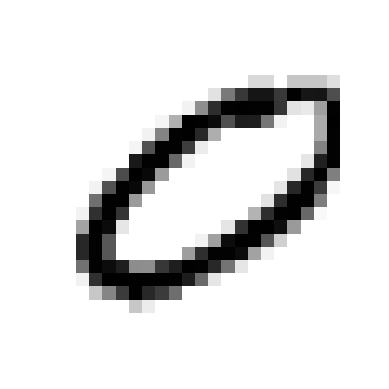

[1.]


In [19]:
import matplotlib
import matplotlib.pyplot as plt

i = 1
plt.imshow(x_train[:, i].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()
print(y_train[:, i])

##### A Single Neuron(aka Logistic Regression)

In [ ]:
# We'll build a simple, feed-forward network with 784 inputs(=28*28), and a sigle sigmoid unit generating the output
# sigmoid activation function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [37]:
# We'll vectorize by stacking examples side-by-side, so that our input matrix x has an example in each column.(y_hat = sigmoid(w.T * b))
# Since we build a single node single hidden layer feed-forward network, The shape of w is (784, 1), so that of w.T is (1, 784)
# The shape of x is (784, 60000), so that the shape of y_hat is (1, 60000), which is the same as that of y.
# The shape of b is (1,) since we have a single node in a single hidden layer.

# We'll use cross-entropy loss for out cost function.
def compute_loss(y, y_hat):
    m = y.shape[1]
    loss = -(1/m) * np.sum(np.multiply(y, np.log(y_hat)) + np.multiply((1-y), np.log(1-y_hat)))
    return loss

In [ ]:
# BackPropagation
# For backpropagation, we need to know how L(loss) changes with respect to each component wj of w. That is, we must compute each eL/ewj.
# Focusing on a single example we'll make it easier to derive the fomulas we need. 
# Holding all values except wj fixed, we can think of L as being computed as f